## Observations and Insights 

Based on the data below:

1.From the selected treatements Capomulin and Ramicane seems to reduce the size of tumors the best.

2.Capomulin and Ramicane also had the most data points out of the drugs present in the study.

3.The correlation between mouse weight and the avg tumor volume is approximately 0.84, this implies a strong positive correlation.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data=pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])
# Display the data table for preview
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice=merge_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice=merge_data.loc[merge_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

dup_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_data[merge_data["Mouse ID"]=="g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=merge_data[merge_data["Mouse ID"].isin(dup_mice)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
mice=clean_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
small_df=clean_data.loc[:,["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean=small_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=small_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
vari=small_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=small_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=small_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

analysis_df=pd.DataFrame({"Tumor Volume Mean":mean,"Tumor Volume Median":median,"Variance":vari, "STD": sd, "SEM": sem})

analysis_df=analysis_df.round(2)

analysis_df

,Tumor Volume Mean,Tumor Volume Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
single_groupby=small_df.groupby("Drug Regimen")
analysis2_df = single_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
analysis2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Datapoints per Regimen')

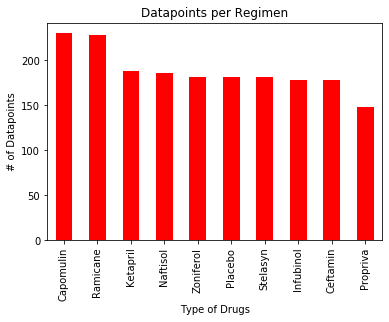

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_count=clean_data["Drug Regimen"].value_counts()
y_axis=drug_count.values
x_axis=drug_count.index

#DataFrame.plot using pandas
drug_count.plot(kind="bar", facecolor="red")

#Formating
plt.ylabel("# of Datapoints")
plt.xlabel("Type of Drugs")
plt.title("Datapoints per Regimen")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

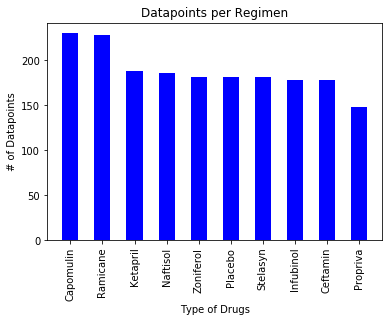

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(x_axis,y_axis,color="b",align="center",width=0.5)

plt.ylabel("# of Datapoints")
plt.xlabel("Type of Drugs")
plt.title("Datapoints per Regimen")
plt.xticks(rotation=90)

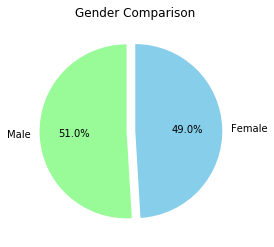

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gen_count=clean_data["Sex"].value_counts()



gen_count.plot(kind="pie", explode=[0.1,0],colors=["palegreen","skyblue"],autopct="%1.1f%%",startangle=90)
plt.title("Gender Comparison")
plt.ylabel("")
plt.show()


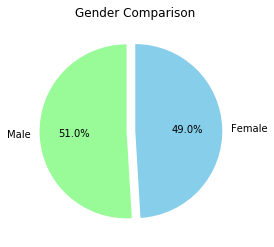

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=gen_count.index
sizes=gen_count.values

plt.pie(sizes,explode=[0.1,0],labels=labels,colors=["palegreen","skyblue"],autopct="%1.1f%%",startangle=90)
plt.title("Gender Comparison")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
lasttime_df=clean_data.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
bestregimes_df=pd.merge(lasttime_df, clean_data,on=("Mouse ID","Timepoint"),how="left")
bestregimes_df=bestregimes_df[bestregimes_df["Drug Regimen"].isin(regimens)]
bestregimes_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [37]:
tumors=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimens:
    temp=bestregimes_df.loc[bestregimes_df["Drug Regimen"]==regimen,:]["Tumor Volume (mm3)"]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles=temp.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{regimen} potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")
    # Determine outliers using upper and lower bounds
    for value in temp:
        if value>upper_bound or value<lower_bound:
            print(f"{value} is an outlier in {regimen}")
    # add subset 
    tumors.append(temp)  

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
36.321345799999996 is an outlier in Infubinol
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


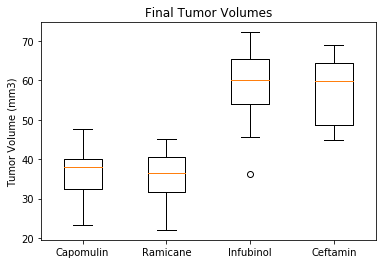

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumors,labels=regimens)
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

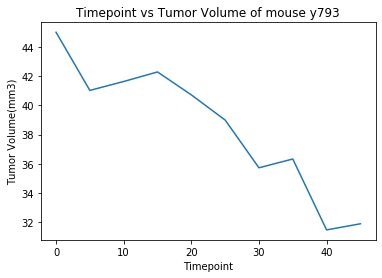

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse=clean_data.loc[clean_data["Mouse ID"]=="y793"]

plt.plot(mouse["Timepoint"],mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Timepoint vs Tumor Volume of mouse y793")

plt.show()

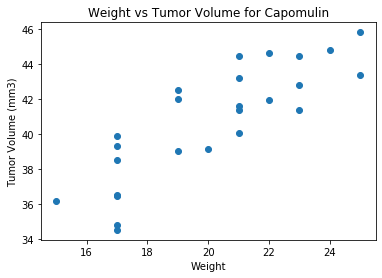

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data=clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"].groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_data["Weight (g)"],capomulin_data["Tumor Volume (mm3)"])
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

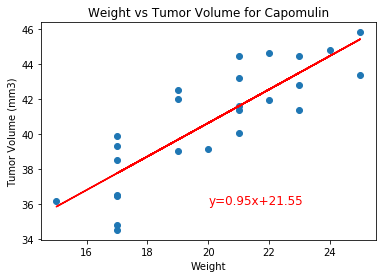

Correlation between weight and tumor volume is 0.84


In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(capomulin_data["Weight (g)"],capomulin_data["Tumor Volume (mm3)"])
regress_value=capomulin_data["Weight (g)"]*slope+intercept
line_eq=f"y={round(slope,2)}x+{round(intercept,2)}"

plt.scatter(capomulin_data["Weight (g)"],capomulin_data["Tumor Volume (mm3)"])
plt.plot(capomulin_data["Weight (g)"],regress_value,color="red")
plt.annotate(line_eq,(20,36),color="red",fontsize=12)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
print(f"Correlation between weight and tumor volume is {round(rvalue,2)}")